In [1]:
## data source
## http://insideairbnb.com/get-the-data.html

In [2]:
import os
os.getcwd()

'e:\\UCI\\2021 Fall\\Data and Programming Analytics\\Final project'

In [3]:
# import packages (data)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit, ols, glm

In [4]:
# import packages (visualization)

import seaborn as sns # heatmap
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
#import packages (text cleaning)

import nltk
import re
from nltk.stem import WordNetLemmatizer
import string

In [6]:
# Raw data (New York September 08 / 2021)

df = pd.read_csv("listings_NY.csv")
df.shape

(36923, 74)

In [7]:
# To get all the column names

my_list = list(df)
#my_list

# Exploratory Visuals

## Descriptive Statistics

In [8]:
#create copy of dataframe for exploratory visuals
df_explore = df.copy(deep=True)

#convert response rate and price into floats
df_explore['host_response_rate'] = df_explore['host_response_rate'].str.replace('%', '')
df_explore['host_response_rate'] = df_explore['host_response_rate'].astype(float)
df_explore['host_response_rate'] = df_explore['host_response_rate']/100

df_explore['price'] = df_explore['price'].str.replace('$', '')
df_explore['price'] = df_explore['price'].str.replace(',','')
df_explore['price'] = df_explore['price'].astype(float)

#run descriptive statistics
round(df_explore.describe(), 3)

<ipython-input-8-b5dcb9587bdd>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_explore['price'] = df_explore['price'].str.replace('$', '')


id     scrape_id       host_id  host_response_rate  \
count  3.692300e+04  3.692300e+04  3.692300e+04           21180.000   
mean   2.779015e+07  2.021090e+13  1.074324e+08               0.868   
std    1.660802e+07  4.090000e+00  1.233825e+08               0.269   
min    2.595000e+03  2.021090e+13  2.438000e+03               0.000   
25%    1.259052e+07  2.021090e+13  1.067204e+07               0.900   
50%    2.858319e+07  2.021090e+13  4.693810e+07               1.000   
75%    4.346777e+07  2.021090e+13  1.824302e+08               1.000   
max    5.200698e+07  2.021090e+13  4.209650e+08               1.000   

       host_listings_count  host_total_listings_count   latitude  longitude  \
count            36812.000                  36812.000  36923.000  36923.000   
mean                32.769                     32.769     40.729    -73.950   
std                213.665                    213.665      0.056      0.050   
min                  0.000                      0.000     40.509    -74.241   
25%                  1.000                      1.000     40.689    -73.983   
50%                  1.000                      1.000     40.726    -73.955   
75%                  3.000                      3.000     40.763    -73.931   
max               5069.000                   5069.000     40.914    -73.705   

       accommodates  bathrooms  ...  review_scores_checkin  \
count     36923.000        0.0  ...              26991.000   
mean          2.798        NaN  ...                  4.818   
std           1.860        NaN  ...                  0.438   
min           0.000        NaN  ...                  0.000   
25%           2.000        NaN  ...                  4.820   
50%           2.000        NaN  ...                  4.960   
75%           4.000        NaN  ...                  5.000   
max          16.000        NaN  ...                  5.000   

       review_scores_communication  review_scores_location  \
count                    27002.000               26987.000   
mean                         4.814                   4.754   
std                          0.457                   0.415   
min                          0.000                   0.000   
25%                          4.820                   4.670   
50%                          4.980                   4.880   
75%                          5.000                   5.000   
max                          5.000                   5.000   

       review_scores_value  license  calculated_host_listings_count  \
count            26987.000      0.0                       36923.000   
mean                 4.651      NaN                          13.591   
std                  0.514      NaN                          45.119   
min                  0.000      NaN                           1.000   
25%                  4.560      NaN                           1.000   
50%                  4.790      NaN                           1.000   
75%                  5.000      NaN                           3.000   
max                  5.000      NaN                         307.000   

       calculated_host_listings_count_entire_homes  \
count                                    36923.000   
mean                                         6.785   
std                                         31.266   
min                                          0.000   
25%                                          0.000   
50%                                          1.000   
75%                                          1.000   
max                                        297.000   

       calculated_host_listings_count_private_rooms  \
count                                     36923.000   
mean                                          6.677   
std                                          29.159   
min                                           0.000   
25%                                           0.000   
50%                                           0.000   
75%                                

## Word Clouds / Text Analysis

In [9]:
# select columns for text cleaning. we want to look at the description, neighborhood overview, and amenities fields

df_text = df[["id","price","description","neighborhood_overview",
                "amenities","review_scores_rating"]]
df_text.shape
df_text.head()

id    price                                        description  \
0  2595  $150.00  Beautiful, spacious skylit studio in the heart...   
1  3831   $76.00  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  5121   $60.00  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  5136  $275.00  We welcome you to stay in our lovely 2 br dupl...   
4  5178   $68.00  Please don’t expect the luxury here just a bas...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3                                                NaN   
4    Theater district, many restaurants around here.   

                                           amenities  review_scores_rating  
0  ["Free street parking", "Heating", "TV", "Dedi...                  4.70  
1  ["Dedicated workspace", "Iron", "Stove", "Hair...                  4.46  
2  ["Kitchen", "Long term stays allowed", "Air co...                  4.52  
3  ["Dryer", "BBQ grill", "Kitchen", "Long term s...                  5.00  
4  ["Hot water", "Bed linens", "Extra pillows and...                  4.21

In [10]:
# create dataframe copy
df_textclean = df_text.copy(deep=True)

# delete $, ","
df_textclean['price'] = df_textclean['price'].str.replace('$', '')
df_textclean['price'] = df_textclean['price'].str.replace(',','')

# convert price to float
df_textclean['price'] = df_textclean['price'].astype(float)

<ipython-input-10-c2e8721dba8d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_textclean['price'] = df_textclean['price'].str.replace('$', '')


In [11]:
#make sure text fields are strings
df_textclean['description'] = df_text['description'].astype(str)
df_textclean['neighborhood_overview'] = df_text['neighborhood_overview'].astype(str)
df_textclean['amenities'] = df_text['amenities'].astype(str)

In [12]:
#we want to do text analysis on the top-priced airbnb's
#descriptive statistics
df_textclean.price.mode()
df_textclean.describe()
#price stats - min: $0, mean: $169, 25%: $70, 50% (median): $110, 75%: $184, max: $10,000, mode: $150

#create dataframe with top 25% priced airbnb's (> $184)
df_highprice = df_textclean[df_textclean.price > 184]

In [13]:
#convert description column for high priced airbnb's to a string
describe = str(list(df_highprice.description))
describe_lower = describe.lower()
#replace <br /> characters with spaces
describe2 = describe_lower.replace('<br />', '')
describe3 = describe2.replace('<b>', '')
describe4 = describe3.replace('</b>', '')

In [14]:
#split words by white space and punctuation
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokens_descr = word_tokenize(describe4)
print(tokens_descr[:50]) #print first 50 words to check

#remove standalone punctuation
justwords_descr = [word for word in tokens_descr if word.isalpha()]
print(justwords_descr[:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maggie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['[', "'we", 'welcome', 'you', 'to', 'stay', 'in', 'our', 'lovely', '2', 'br', 'duplex', 'in', 'south', 'slope', ',', 'brooklyn', '.', 'our', 'home', 'is', 'a', 'truly', 'spacious', 'respite', 'from', 'the', 'busy', 'city-', 'close', 'to', 'subways', ',', 'restaurants', ',', 'cafes', 'and', 'parks', '.', 'enjoy', 'a', 'gourmet', 'kitchen', ',', 'patio', ',', 'grill', ',', 'backyard', '!']
['welcome', 'you', 'to', 'stay', 'in', 'our', 'lovely', 'br', 'duplex', 'in', 'south', 'slope', 'brooklyn', 'our', 'home', 'is', 'a', 'truly', 'spacious', 'respite', 'from', 'the', 'busy', 'close', 'to', 'subways', 'restaurants', 'cafes', 'and', 'parks', 'enjoy', 'a', 'gourmet', 'kitchen', 'patio', 'grill', 'backyard', 'we', 'are', 'open', 'to', 'a', 'longer', 'term', 'rental', 'please', 'contact', 'me', 'for', 'your']


In [15]:
#remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_descr = [w for w in justwords_descr if not w in stop_words]
print(stop_descr[:50])

#convert list to string
description_clean = ''
for i in stop_descr:
    description_clean += i + " "
description_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maggie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['welcome', 'stay', 'lovely', 'br', 'duplex', 'south', 'slope', 'brooklyn', 'home', 'truly', 'spacious', 'respite', 'busy', 'close', 'subways', 'restaurants', 'cafes', 'parks', 'enjoy', 'gourmet', 'kitchen', 'patio', 'grill', 'backyard', 'open', 'longer', 'term', 'rental', 'please', 'contact', 'needs', 'longer', 'term', 'rental', 'months', 'etc', 'spacesleeps', 'king', 'bed', 'master', 'bedroom', 'twin', 'bunk', 'beds', 'br', 'third', 'bedroom', 'locked', 'storage', 'located']


'welcome stay lovely br duplex south slope brooklyn home truly spacious respite busy close subways restaurants cafes parks enjoy gourmet kitchen patio grill backyard open longer term rental please contact needs longer term rental months etc spacesleeps king bed master bedroom twin bunk beds br third bedroom locked storage located steps restaurants bars coffeeshops shopping blocks r train min walk prospect manhattan min subway ride away district min subwaynote home live two children leave condo clean lot belongings remain house stowed away closets shelves set aside r coming town work play love victorian townhouse live site greet upon enjoy kitchenette bedroom bathroom living area huge garden sq townhouse big tv internet garden access nyc compliant fully vaxed spacecalifornia bed en suite bathroom shower tub spacious ny clean follow cdc guidelines disinfecting kitchenette stove features cooktop microwave sink coffeepot teapot well coffee tea oven share kitchen one flight cook much stairs

In [16]:
#import wordcloud generators
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

You should consider upgrading via the 'C:\Anaconda3\envs\Py38\python.exe -m pip install --upgrade pip' command.


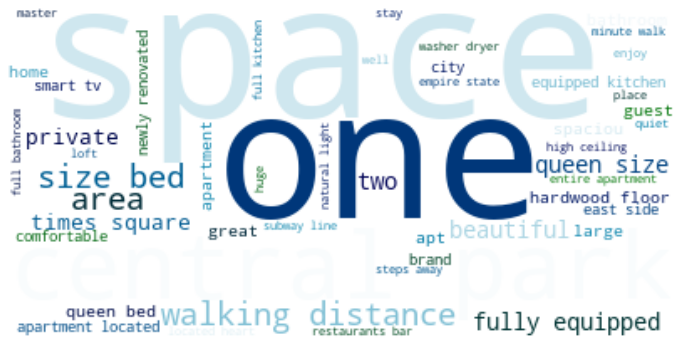

In [17]:
#remove irrelevant words from wordcloud
stopwords_wc = set(STOPWORDS)
stopwords_wc.update(["new", "york", "nyc", "room", "bedroom", "living"])

#make a wordcloud showing the most common words in the descriptions for high priced (top 25%) listings
wordcloud_sq = WordCloud(stopwords=stopwords_wc, max_words = 50, min_font_size = 7, colormap='ocean', background_color="white").generate(description_clean)
plt.figure(figsize=[12,15])
plt.imshow(wordcloud_sq, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#repeat previous steps for neighborhood overview variable. convert neighborhood overview column for high priced airbnb's to a string
neighborhood = str(list(df_highprice.neighborhood_overview))
neighborhood_lower = neighborhood.lower()
neighborhood_lower
#replace nan and <br> characters with spaces
neighborhood2 = neighborhood_lower.replace('nan', '')
neighborhood3 = neighborhood2.replace('<br />', '')

In [19]:
#split by white space and punctuation
tokens_neighbor = word_tokenize(neighborhood3)
print(tokens_neighbor[:50])

#remove standalone punctuation
justwords_neighbor = [word for word in tokens_neighbor if word.isalpha()]
print(justwords_neighbor[:50])

#remove stopwords
stop_words = set(stopwords.words('english'))
stop_neighbor = [w for w in justwords_neighbor if not w in stop_words]
print(stop_neighbor[:50])

['[', '``', ',', '``', 'residential', ',', 'village-like', 'atmosphere', '.', 'lots', 'of', 'restaurants', '.', 'they', 'are', 'unfortunately', 'limited', 'to', 'outdoors', 'and', 'partial', 'indoors', 'during', 'lockdown', '.', 'many', 'grocery', 'stores', '(', 'wegmans', ',', 'trader', 'joes', ',', 'whole', 'foods', ')', '.', 'half', 'block', 'to', 'wonderful', 'fort', 'greene', 'park', ',', 'and', 'saturday', 'farmer', "'s"]
['residential', 'atmosphere', 'lots', 'of', 'restaurants', 'they', 'are', 'unfortunately', 'limited', 'to', 'outdoors', 'and', 'partial', 'indoors', 'during', 'lockdown', 'many', 'grocery', 'stores', 'wegmans', 'trader', 'joes', 'whole', 'foods', 'half', 'block', 'to', 'wonderful', 'fort', 'greene', 'park', 'and', 'saturday', 'farmer', 'market', 'i', 'like', 'the', 'cinnamon', 'donuts', 'and', 'artisanal', 'bread', 'we', 'lived', 'here', 'for', 'over', 'years', 'and']
['residential', 'atmosphere', 'lots', 'restaurants', 'unfortunately', 'limited', 'outdoors', 'p

In [20]:
#convert neighborhood overview list to string
neighborhood_clean = ''
for i in stop_neighbor:
    neighborhood_clean += i + " "

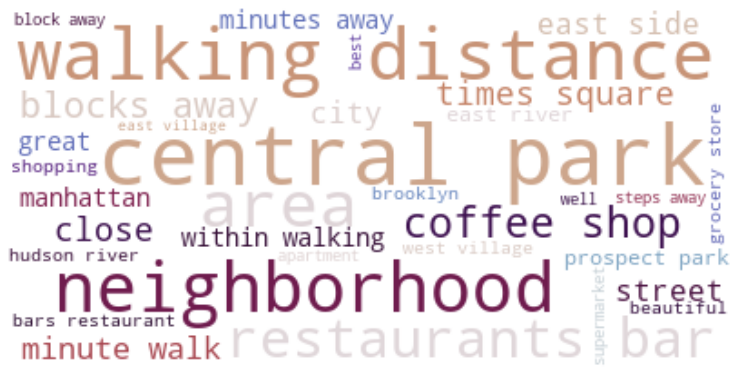

In [21]:
#remove irrelevant words from wordcloud
stopwords_wc = set(STOPWORDS)
stopwords_wc.update(["new", "york", "nyc"])

#make a wordcloud showing the most common words in the neighborhood overview section for high priced (top 25%) listings
wordcloud2_sq = WordCloud(stopwords=stopwords_wc, max_words=50, min_font_size = 7, colormap="twilight_shifted", background_color="white").generate(neighborhood_clean)
plt.figure(figsize=[13,15])
plt.imshow(wordcloud2_sq, interpolation='bilinear')
plt.axis("off")
plt.show()

# Regression Model Cleaning

In [22]:
# split df by location

bronx  = df[df.neighbourhood_group_cleansed == "Bronx"]
brook  = df[df.neighbourhood_group_cleansed == "Brooklyn"]
man    = df[df.neighbourhood_group_cleansed == "Manhattan"]
queens = df[df.neighbourhood_group_cleansed == "Queens"]
si     = df[df.neighbourhood_group_cleansed == "Staten Island"]

In [23]:
# select variables

variables = ["price",
             
             "room_type",
             "neighbourhood_group_cleansed",
             
             "beds",           
             "bedrooms",
             "accommodates",
             
             "instant_bookable",
             "host_identity_verified",
             'host_is_superhost',    
             'host_response_rate',
             'host_acceptance_rate',
             'calculated_host_listings_count', 
            
             'review_scores_rating',
             'review_scores_accuracy',
             'review_scores_cleanliness',
             'review_scores_checkin',
             'review_scores_communication',
             'review_scores_location',
             'review_scores_value',
             
             'availability_30',
             'availability_60',
             'availability_90',
             'availability_365',
             
             'minimum_nights',
             'maximum_nights',

             'number_of_reviews_ltm'
            ]

In [24]:
# select columns

df_select = df[variables]
bronx_select = bronx[variables]
brook_select = brook[variables]
man_select = man[variables]
queens_select = queens[variables]
si_select = si[variables]
df_select.shape

(36923, 26)

In [25]:
# delete NaN Values

df_clean = df_select.dropna()
bronx_clean = bronx_select.dropna()
brook_clean = brook_select.dropna()
man_clean = man_select.dropna()
queens_clean = queens_select.dropna()
si_clean = si_select.dropna()
df_clean.shape

(13558, 26)

In [26]:
# make neighbourhood_group_cleansed to dummy variable

dummy = pd.get_dummies(df_clean.neighbourhood_group_cleansed)

# add dummy variables to df_clean

df_new = pd.concat([df_clean, dummy], axis=1)

# delete neighbourhood_group_cleansed

df_new.drop(columns=["neighbourhood_group_cleansed"], inplace=True)

In [27]:
# make room_type to dummy variable

dummy2 = pd.get_dummies(df_new.room_type)
dummy2_bronx = pd.get_dummies(bronx_clean.room_type)
dummy2_brook = pd.get_dummies(brook_clean.room_type)
dummy2_man = pd.get_dummies(man_clean.room_type)
dummy2_queens = pd.get_dummies(queens_clean.room_type)
dummy2_si= pd.get_dummies(si_clean.room_type)

# add dummy variables to df_clean

df_new = pd.concat([df_new, dummy2], axis=1)
bronx_new = pd.concat([bronx_clean, dummy2_bronx], axis=1)
brook_new = pd.concat([brook_clean, dummy2_brook], axis=1)
man_new = pd.concat([man_clean, dummy2_man], axis=1)
queens_new = pd.concat([queens_clean, dummy2_queens], axis=1)
si_new = pd.concat([si_clean, dummy2_si], axis=1)

# delete room_type

df_new.drop(columns=["room_type"], inplace=True)
bronx_new.drop(columns=["room_type"], inplace=True)
brook_new.drop(columns=["room_type"], inplace=True)
man_new.drop(columns=["room_type"], inplace=True)
queens_new.drop(columns=["room_type"], inplace=True)
si_new.drop(columns=["room_type"], inplace=True)

In [28]:
# replace t/f value to 1/0

clean_dataset = [df_new, bronx_new, brook_new, man_new, queens_new, si_new]

for i in clean_dataset:
    i['instant_bookable'] = i['instant_bookable'].replace(('t','f'),("1","0"))
    i['instant_bookable'] = i['instant_bookable'].astype(float)
    i['host_identity_verified'] = i['host_identity_verified'].replace(('t','f'),("1","0"))
    i['host_identity_verified'] = i['host_identity_verified'].astype(float)
    i['host_is_superhost'] = i['host_is_superhost'].replace(('t','f'),("1","0"))
    i['host_is_superhost'] = i['host_is_superhost'].astype(float)

In [29]:
# replace unit8 to numeric

df_new['Bronx'] = df_new['Bronx'].astype(float)
df_new['Brooklyn'] = df_new['Brooklyn'].astype(float)
df_new['Manhattan'] = df_new['Manhattan'].astype(float)
df_new['Queens'] = df_new['Queens'].astype(float)
df_new['Staten Island'] = df_new['Staten Island'].astype(float)
df_new['Entire home/apt'] = df_new['Entire home/apt'].astype(float)
df_new['Hotel room'] = df_new['Hotel room'].astype(float)
df_new['Private room'] = df_new['Private room'].astype(float)
df_new['Shared room'] = df_new['Shared room'].astype(float)

In [30]:
# convert host response rate, host acceptance rate to float

for i in clean_dataset:
    i['host_response_rate'] = i['host_response_rate'].str.replace('%', '')
    i['host_response_rate'] = i['host_response_rate'].astype(float)
    i['host_acceptance_rate'] = i['host_acceptance_rate'].str.replace('%', '')
    i['host_acceptance_rate'] = i['host_acceptance_rate'].astype(float)

In [31]:
# convert price values to float

for i in clean_dataset:
    i['price'] = i['price'].str.replace('$', '')
    i['price'] = i['price'].str.replace(',','')
    i['price'] = i['price'].astype(float)

<ipython-input-31-f86dd8c8ad7f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  i['price'] = i['price'].str.replace('$', '')


In [32]:
# delete outlier
# +- 3 sgma : sigma is too big(becasue of right skewed), so do not use it
# use 1.5IQR instead

lst_upper=[]
lst_lower=[]
for i in clean_dataset:
    q75, q25 = np.percentile(i.price, [75 ,25])
    iqr = q75 - q25
    upper = q75+1.5*iqr
    lower = q25-1.5*iqr
    lst_upper.append(upper)
    lst_lower.append(lower)

df_new = df_new[df_new.price < lst_upper[0]]
bronx_new = bronx_new[bronx_new.price < lst_upper[1]]
brook_new = brook_new[brook_new.price < lst_upper[2]]
man_new = man_new[man_new.price < lst_upper[3]]
queens_new = queens_new[queens_new.price < lst_upper[4]]
si_new = si_new[si_new.price < lst_upper[5]]

In [33]:
# last check the number of observations

df_new.shape

(12593, 33)

In [34]:
# Create correlation matrix

corr_matrix = df_new.corr().abs()

# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7

to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-34-bd4866fc0ba7>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot:>

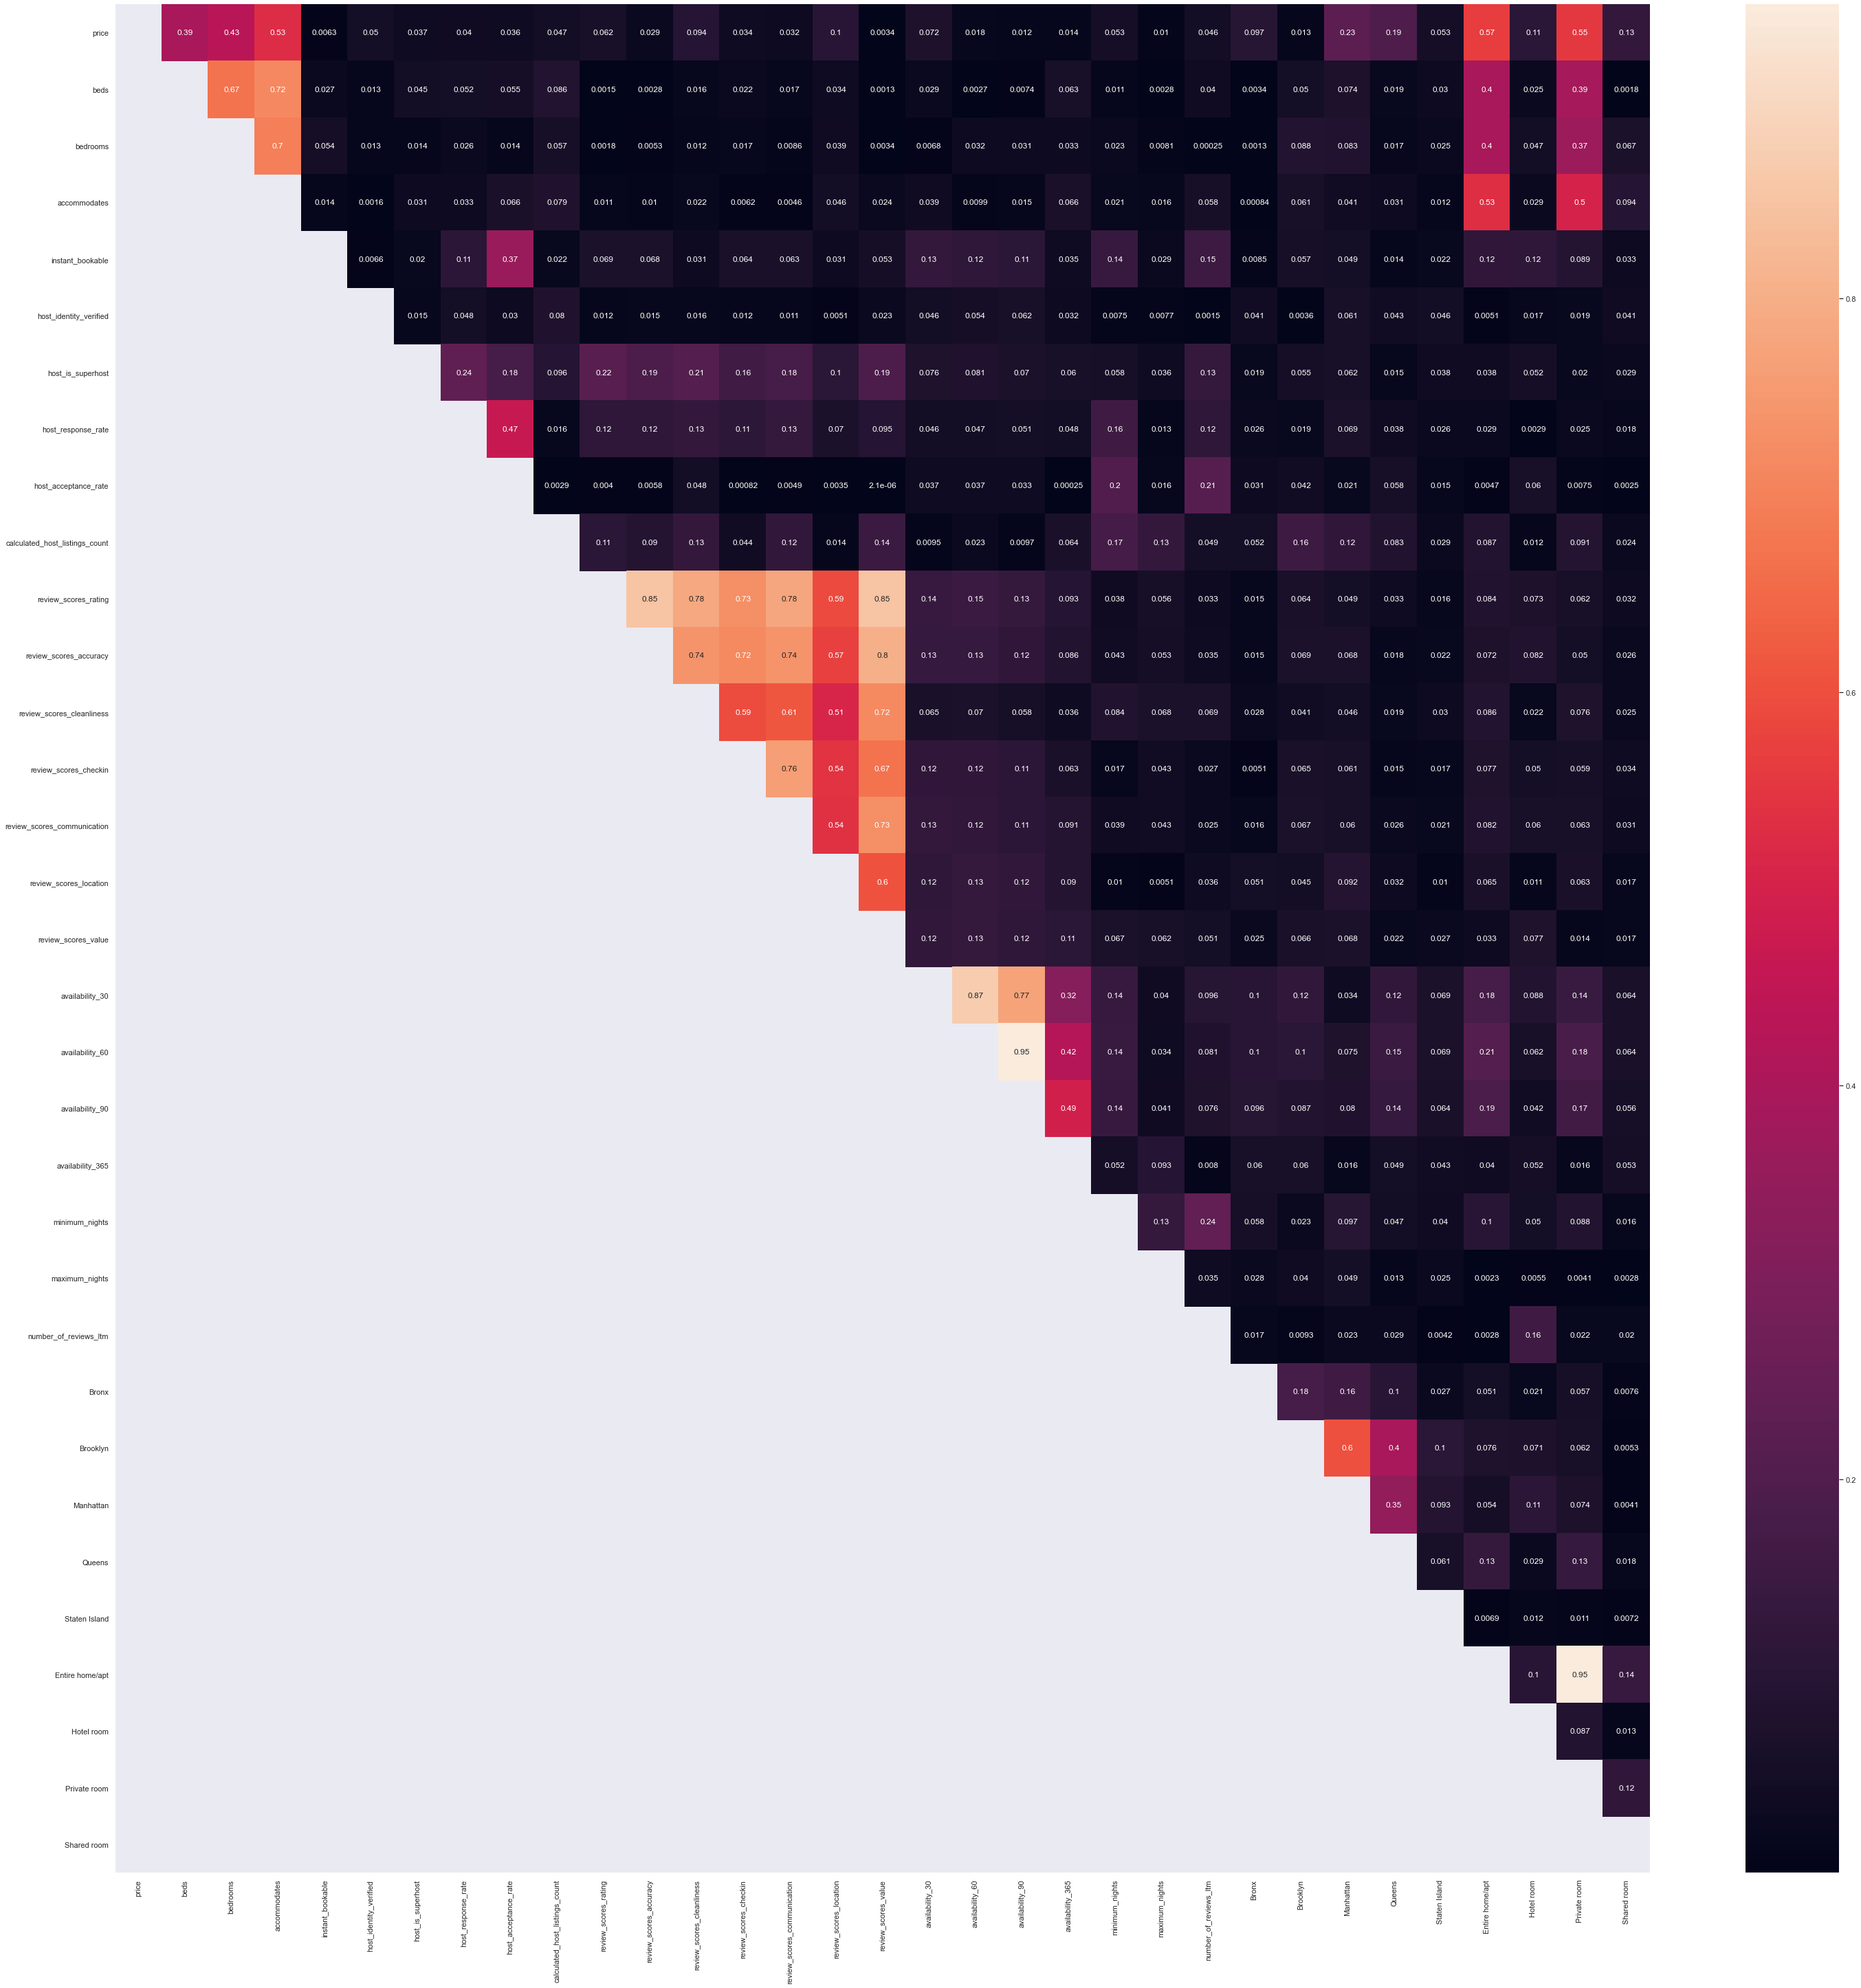

In [35]:
# draw heatmap (all)

sns.set(rc = {'figure.figsize': (50,50)})
sns.heatmap(upper, annot=True)

In [36]:
# check collinearity

df_guest = df_new[['accommodates','beds','bedrooms']]
df_scores = df_new[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location',
                    'review_scores_value',]]
df_avilability = df_new[['availability_30','availability_60','availability_90','availability_365']]
df_super = df_new[["host_is_superhost","host_response_rate",'review_scores_rating']]

corr_guest = df_guest.corr()
corr_scores = df_scores.corr()
corr_availability = df_avilability.corr()
corr_super = df_super.corr()

<AxesSubplot:>

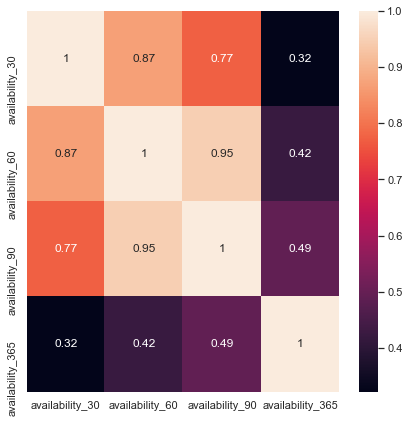

In [37]:
# draw heatmap (partial)

sns.set(rc = {'figure.figsize': (7,7)})
sns.heatmap(corr_availability, annot=True)

In [38]:
# check correlation between price

corr = df_new.corr()
corr_abs = abs(df_new.corr()) # absolute value
corr_abs.price.sort_values(ascending=False)

price                             1.000000
Entire home/apt                   0.565835
Private room                      0.554733
accommodates                      0.529722
bedrooms                          0.433575
beds                              0.393924
Manhattan                         0.227802
Queens                            0.194899
Shared room                       0.127460
Hotel room                        0.106101
review_scores_location            0.100437
Bronx                             0.096955
review_scores_cleanliness         0.094368
availability_30                   0.072275
review_scores_rating              0.061638
Staten Island                     0.053121
minimum_nights                    0.053022
host_identity_verified            0.050477
calculated_host_listings_count    0.046719
number_of_reviews_ltm             0.046001
host_response_rate                0.040329
host_is_superhost                 0.036924
host_acceptance_rate              0.036164
review_scor

# Regression Modeling

In [39]:
# spllit dataset to training and test (ordinal)

all_70 = df_new.iloc[:int(len(df_new)*(70/100))]
all_30 = df_new.drop(all_70.index)

bronx_70 = bronx_new.iloc[:int(len(bronx_new)*(70/100))]
bronx_30 = bronx_new.drop(bronx_70.index)

brook_70 = brook_new.iloc[:int(len(brook_new)*(70/100))]
brook_30 = brook_new.drop(brook_70.index)

man_70 = man_new.iloc[:int(len(man_new)*(70/100))]
man_30 = man_new.drop(man_70.index)

queens_70 = queens_new.iloc[:int(len(queens_new)*(70/100))]
queens_30 = queens_new.drop(queens_70.index)

si_70 = si_new.iloc[:int(len(si_new)*(70/100))]
si_30 = si_new.drop(si_70.index)

In [40]:
# Run regression

Y = all_70['price']
X = all_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',

    # default is Bronx
    'Brooklyn',
    'Manhattan',
    'Queens',
    'Staten Island',
    
    'accommodates', 
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count',  
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     409.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:36:55   Log-Likelihood:                -47364.
No. Observations:                8815   AIC:                         9.478e+04
Df Residuals:                    8790   BIC:                         9.495e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
# Run regression after removing

Y = all_70['price']
X = all_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',

    # default is Bronx
    'Brooklyn',
    'Manhattan',
    'Queens',
    'Staten Island',
    
    'accommodates',
#    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
#    'calculated_host_listings_count', 
#    'review_scores_accuracy',
    'review_scores_cleanliness',
#    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights',
#    'maximum_nights',
    'number_of_reviews_ltm'
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     516.9
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:36:55   Log-Likelihood:                -47367.
No. Observations:                8815   AIC:                         9.477e+04
Df Residuals:                    8795   BIC:                         9.491e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
# Run regression with test set

Y = all_30['price']
X = all_30[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',

    # default is Bronx
    'Brooklyn',
    'Manhattan',
    'Queens',
    'Staten Island',
    
    'accommodates',
#    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
#    'calculated_host_listings_count', 
#    'review_scores_accuracy',
    'review_scores_cleanliness',
#    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights',
#    'maximum_nights',
    'number_of_reviews_ltm'
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     205.9
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:36:55   Log-Likelihood:                -20571.
No. Observations:                3778   AIC:                         4.118e+04
Df Residuals:                    3759   BIC:                         4.130e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
# Bronx training before removing

Y = bronx_70['price']
X = bronx_70[[
    # default is entire home/apt
#    'Hotel room',
    'Private room',
    'Shared room',
    
    'accommodates',
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_30',  
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm'
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     27.82
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.30e-57
Time:                        20:36:55   Log-Likelihood:                -1666.6
No. Observations:                 357   AIC:                             3373.
Df Residuals:                     337   BIC:                             3451.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [44]:
# Bronx training after removing

# Bronx

Y = bronx_70['price']
X = bronx_70[[
    # default is entire home/apt
#    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'host_is_superhost',    
    'review_scores_accuracy',
    'review_scores_cleanliness',             
    'availability_30'
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     75.59
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           4.18e-66
Time:                        20:36:55   Log-Likelihood:                -1670.2
No. Observations:                 357   AIC:                             3356.
Df Residuals:                     349   BIC:                             3387.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
# Bronx test

# Bronx

Y = bronx_30['price']
X = bronx_30[[
    # default is entire home/apt
#    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'host_is_superhost',    
    'review_scores_accuracy',
    'review_scores_cleanliness',             
    'availability_30'
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     32.15
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.62e-24
Time:                        20:36:55   Log-Likelihood:                -732.21
No. Observations:                 154   AIC:                             1478.
Df Residuals:                     147   BIC:                             1500.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
# Brooklyn training before removing 

Y = brook_70['price']
X = brook_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    
    'accommodates',
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',             
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     176.6
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:36:56   Log-Likelihood:                -19072.
No. Observations:                3556   AIC:                         3.819e+04
Df Residuals:                    3535   BIC:                         3.832e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
# Brooklyn training after removing 

Y = brook_70['price']
X = brook_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_value',  
    'availability_30',
    'minimum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     235.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:36:56   Log-Likelihood:                -19073.
No. Observations:                3556   AIC:                         3.818e+04
Df Residuals:                    3540   BIC:                         3.828e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [48]:
# Brooklyn test

Y = brook_30['price']
X = brook_30[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_value',  
    'availability_30',
    'minimum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     106.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          5.31e-213
Time:                        20:36:56   Log-Likelihood:                -8304.2
No. Observations:                1524   AIC:                         1.664e+04
Df Residuals:                    1509   BIC:                         1.672e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [49]:
# manhattan training before removing

Y = man_70['price']
X = man_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    
    'accommodates',
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     140.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:36:56   Log-Likelihood:                -18100.
No. Observations:                3214   AIC:                         3.624e+04
Df Residuals:                    3193   BIC:                         3.637e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [50]:
# manhattan training after removing

Y = man_70['price']
X = man_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'instant_bookable',
    'calculated_host_listings_count', 
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     211.9
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:36:56   Log-Likelihood:                -18116.
No. Observations:                3214   AIC:                         3.626e+04
Df Residuals:                    3200   BIC:                         3.634e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
# manhattan test

Y = man_30['price']
X = man_30[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'instant_bookable',
    'calculated_host_listings_count', 
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights', 
    'maximum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     89.14
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          6.32e-162
Time:                        20:36:56   Log-Likelihood:                -7778.8
No. Observations:                1378   AIC:                         1.558e+04
Df Residuals:                    1365   BIC:                         1.565e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
# queens training before removing

Y = queens_70['price']
X = queens_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    
    'accommodates',
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm'
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     124.1
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          4.10e-304
Time:                        20:36:56   Log-Likelihood:                -7539.4
No. Observations:                1574   AIC:                         1.512e+04
Df Residuals:                    1553   BIC:                         1.523e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
# queens training after removing

Y = queens_70['price']
X = queens_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'host_is_superhost',    
    'review_scores_cleanliness',
    'review_scores_location',
    'availability_30',
    'minimum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     248.2
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          4.61e-314
Time:                        20:36:56   Log-Likelihood:                -7542.5
No. Observations:                1574   AIC:                         1.511e+04
Df Residuals:                    1563   BIC:                         1.517e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [54]:
# queens test

Y = queens_30['price']
X = queens_30[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'host_is_superhost',    
    'review_scores_cleanliness',
    'review_scores_location',
    'availability_30',
    'minimum_nights',
    'number_of_reviews_ltm',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     133.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          1.27e-142
Time:                        20:36:56   Log-Likelihood:                -3292.1
No. Observations:                 675   AIC:                             6604.
Df Residuals:                     665   BIC:                             6649.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [55]:
# si training before removing

Y = si_70['price']
X = si_70[[
    # default is entire home/apt
#    'Hotel room',
    'Private room',
    'Shared room',
    
    'accommodates',
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm'
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     12.10
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           2.72e-19
Time:                        20:36:56   Log-Likelihood:                -611.57
No. Observations:                 133   AIC:                             1263.
Df Residuals:                     113   BIC:                             1321.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [56]:
# si training after removing

Y = si_70['price']
X = si_70[[
    # default is entire home/apt
#    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'availability_30',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     48.31
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.05e-24
Time:                        20:36:56   Log-Likelihood:                -624.18
No. Observations:                 133   AIC:                             1258.
Df Residuals:                     128   BIC:                             1273.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              71.7614      7.696     

In [57]:
# si test

Y = si_30['price']
X = si_30[[
    # default is entire home/apt
#    'Hotel room',
    'Private room',
    'Shared room',
    'accommodates',
    'availability_30',
]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     21.70
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           2.67e-09
Time:                        20:36:56   Log-Likelihood:                -269.35
No. Observations:                  57   AIC:                             546.7
Df Residuals:                      53   BIC:                             554.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              90.3950     11.968     

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
# remove p-value above 0.05 (forward selection)

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [59]:
# split dataset to training and test (randomly)

# Creating a dataframe with 70% values of original dataframe
#part_70 = df_new.sample(frac = 0.7)
 
# Creating dataframe with rest of the 30% values
#part_30 = df_new.drop(part_70.index)

In [60]:
# run regression 20 times with random sampling (70%)

res=[]
for i in range(0,20):
    part_70 = df_new.sample(frac = 0.7)
    Y = part_70['price']
    X = part_70[[
    # default is entire home/apt
    'Hotel room',
    'Private room',
    'Shared room',

    # default is Bronx
    'Brooklyn',
    'Manhattan',
    'Queens',
    'Staten Island',
    
    'accommodates', 

    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count', 
             
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
             
    'availability_30',
             
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm'
]]
    selected = forward_selection(X,Y)
    res.append(selected)

<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will b

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-58-9faf5d875475>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\envs\Py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a fu

In [61]:
# find duplication for each forward selection variables

dup={
    'Hotel room',
    'Private room',
    'Shared room',
    'Brooklyn',
    'Manhattan',
    'Queens',
    'Staten Island',
    'accommodates', 
    'instant_bookable',
    'host_identity_verified',
    'host_is_superhost',    
    'host_response_rate',
    'host_acceptance_rate',
    'calculated_host_listings_count', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',  
    'availability_30',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm'}
for i in range(0,20):
    dup = dup & set(res[i])
dup

{'Brooklyn',
 'Hotel room',
 'Manhattan',
 'Private room',
 'Queens',
 'Shared room',
 'accommodates',
 'availability_30',
 'host_identity_verified',
 'minimum_nights',
 'number_of_reviews_ltm',
 'review_scores_cleanliness',
 'review_scores_location',
 'review_scores_value'}